# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dc_file = pd.read_csv('diabetes.csv')
dc_file.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

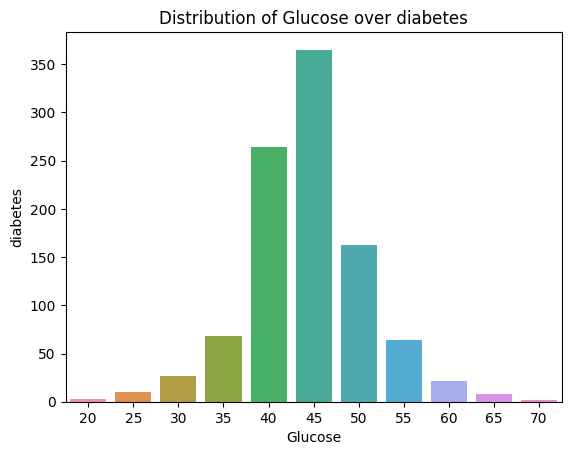

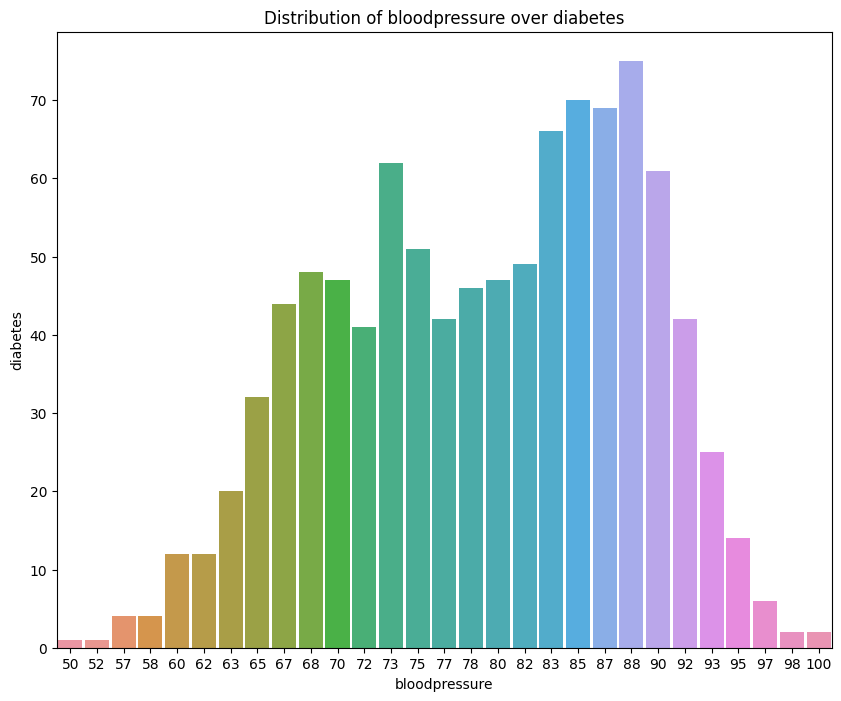

In [3]:
sns.countplot(x='glucose',data = dc_file)
plt.xlabel('Glucose')
plt.ylabel('diabetes')
plt.title("Distribution of Glucose over diabetes")
plt.show()
#sns.barplot(x='glucose',y = 'diabetes',data = dc_file)
plt.figure(figsize=(10,8))
sns.countplot(x='bloodpressure',data = dc_file, width=0.9)
plt.xlabel('bloodpressure')
plt.ylabel('diabetes')
plt.title("Distribution of bloodpressure over diabetes")
plt.show()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = dc_file[['glucose']]
y = dc_file['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.5, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Now comparing with other algorithms 

logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

classifiers = [('Logistic Regression ',logreg),
               ('K-nearest Neighbours',knn),
               ('Decision Tree',dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(clf_name, "Acuuracy:",accuracy)

Gaussian Naive Bayes Accuracy: 0.6686746987951807
Logistic Regression  Acuuracy: 0.572289156626506
K-nearest Neighbours Acuuracy: 0.6686746987951807
Decision Tree Acuuracy: 0.6686746987951807


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [5]:
ins_file = pd.read_csv('insurance.csv')

### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separating categorical and numerical columns
numerical_cols = ins_file.select_dtypes(include=['number']).columns
categorical_cols = ins_file.select_dtypes(include=['object']).columns

# Label encoding categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    ins_file[col] = label_encoder.fit_transform(ins_file[col])

# Scaling the numerical columns
scaler = StandardScaler()
for col2 in numerical_cols:
    ins_file[[col2]] = scaler.fit_transform(ins_file[[col2]])

# Separating the 'charges' column for separate scaling and error calculation
charges = ins_file['charges']
ins_file['charges'] = scaler.fit_transform(charges.values.reshape(-1, 1))



### 5. Split the data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have X_train, y_train, X_test, and y_test as your training and test data

# Define the parameter grid for RandomizedSearchCV
parameter_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.5, 1.0, 1.5]
}

# Create an SVR instance
svr = SVR()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svr, param_distributions=parameter_grid, cv=3, scoring='neg_mean_absolute_error')

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Create a new SVR model with the best parameters
best_svr = SVR(kernel=best_params['kernel'], gamma=best_params['gamma'])

# Fit the best SVR model on the training data
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)

# Calculate mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [8]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


parameter_grid={
    'n_estimators': [50, 100, 150],
    'loss':['linear','square','exponential']
}

ada_boost = AdaBoostRegressor()

grid_search = GridSearchCV(ada_boost,param_grid=parameter_grid,cv =3,scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

best_par = grid_search.best_params_
print("Best parameters:",best_par)

best_ada_boost = AdaBoostRegressor(n_estimators=best_par['n_estimators'], loss=best_par['loss'])

best_ada_boost.fit(X_train, y_train)

y_pred = best_ada_boost.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

Best parameters: {'loss': 'linear', 'n_estimators': 100}
MAE: 0.38912709538354834
MSE: 0.19522093294208392


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have X_train, y_train, X_test, and y_test as your training and test data

# Random Forest Regressor
rf = RandomForestRegressor()

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_random_search.fit(X_train, y_train)
rf_best_params = rf_random_search.best_params_

rf_best = RandomForestRegressor(**rf_best_params)
rf_best.fit(X_train, y_train)
rf_y_pred = rf_best.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Gradient Boosting Regression
gb = GradientBoostingRegressor()

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_random_search = RandomizedSearchCV(gb, param_distributions=gb_param_grid, cv=3, scoring='neg_mean_absolute_error')
gb_random_search.fit(X_train, y_train)
gb_best_params = gb_random_search.best_params_

gb_best = GradientBoostingRegressor(**gb_best_params)
gb_best.fit(X_train, y_train)
gb_y_pred = gb_best.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)

# XGBoost Regressor
xgb = XGBRegressor()

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(xgb, param_distributions=xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_random_search.fit(X_train, y_train)
xgb_best_params = xgb_random_search.best_params_

xgb_best = XGBRegressor(**xgb_best_params)
xgb_best.fit(X_train, y_train)
xgb_y_pred = xgb_best.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

# Compare the models
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MAE': [rf_mae, gb_mae, xgb_mae],
    'MSE': [rf_mse, gb_mse, xgb_mse]
})

print(results)

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

               Model       MAE       MSE
0      Random Forest  0.386730  0.194028
1  Gradient Boosting  0.386711  0.194026
2            XGBoost  0.386740  0.194027


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [10]:
bms_file = pd.read_csv('bookmyshow_ads.csv')

### 2. Split the data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have X_train, y_train, X_test, and y_test as your training and test data

# Decision Tree
dt = DecisionTreeClassifier()

dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt, param_grid=dt_param_grid, cv=3)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_

dt_best = DecisionTreeClassifier(**dt_best_params)
dt_best.fit(X_train, y_train)
dt_y_pred = dt_best.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Random Forest
rf = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_grid, cv=3)
rf_random_search.fit(X_train, y_train)
rf_best_params = rf_random_search.best_params_

rf_best = RandomForestClassifier(**rf_best_params)
rf_best.fit(X_train, y_train)
rf_y_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# AdaBoost
ada = AdaBoostClassifier()

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada_grid_search = GridSearchCV(ada, param_grid=ada_param_grid, cv=3)
ada_grid_search.fit(X_train, y_train)
ada_best_params = ada_grid_search.best_params_

ada_best = AdaBoostClassifier(**ada_best_params)
ada_best.fit(X_train, y_train)
ada_y_pred = ada_best.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)

# Gradient Boosting
gb = GradientBoostingClassifier()

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb, param_grid=gb_param_grid, cv=3)
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_

gb_best = GradientBoostingClassifier(**gb_best_params)
gb_best.fit(X_train, y_train)
gb_y_pred = gb_best.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# XGBoost
xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=3)
xgb_grid_search.fit(X_train, y_train)
xgb_best_params = xgb_grid_search.best_params_

xgb_best = XGBClassifier(**xgb_best_params)
xgb_best.fit(X_train, y_train)
xgb_y_pred = xgb_best.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Compare the models
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost'],
    'Accuracy': [dt_accuracy, rf_accuracy, ada_accuracy, gb_accuracy, xgb_accuracy]
})

print(results)


            Model  Accuracy
0   Decision Tree  0.668342
1   Random Forest  0.668342
2        AdaBoost  0.668342
3  Gradient Boost  0.668342
4         XGBoost  0.668342


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [45]:
from sklearn.cluster import KMeans


### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [46]:
sd_file = pd.read_csv("segmentation data.csv")
sd_file.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [47]:
sd_file.drop(['Education'], axis=1, inplace=True)
sd_file.head()

,ID,Sex,Marital status,Age,Income,Occupation,Settlement size
0,100000001,0,0,67,124670,1,2
1,100000002,1,1,22,150773,1,2
2,100000003,0,0,49,89210,0,0
3,100000004,0,0,45,171565,1,1
4,100000005,0,0,53,149031,1,1


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

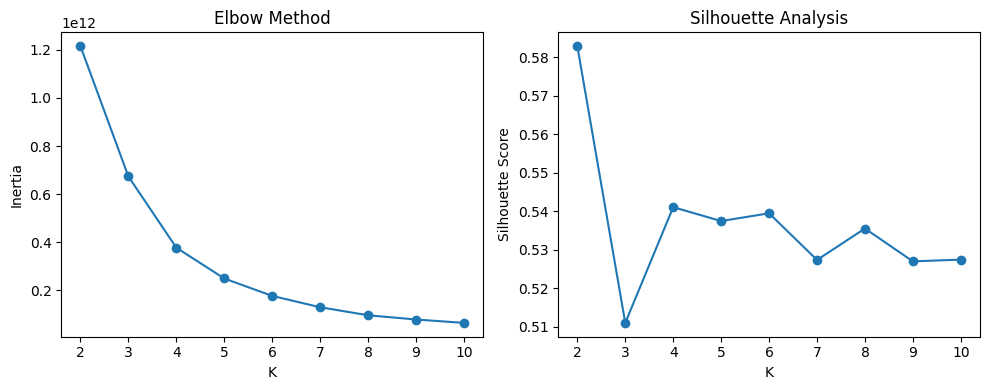

Optimal K based on the Elbow Method: 10
Optimal K based on Silhouette Analysis: 2


In [48]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)

inertia_scores = []
silhouette_scores = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(sd_file)
    inertia = model.inertia_
    silhouette = silhouette_score(sd_file, model.labels_)

    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Plot the inertia scores
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(122)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# Find the optimal value of K based on the plots
optimal_k_elbow = np.argmin(inertia_scores) + 2
optimal_k_silhouette = np.argmax(silhouette_scores) + 2

print("Optimal K based on the Elbow Method:", optimal_k_elbow)
print("Optimal K based on Silhouette Analysis:", optimal_k_silhouette)


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [49]:
optimal_k = 4

# Fit the KMeans model with the optimal K
model = KMeans(n_clusters=optimal_k)
model.fit(sd_file)

# Store the inertia and labels
inertia = model.inertia_
labels = model.labels_

print("Silhouette Score:", silhouette)
print("Inertia:", inertia)
print("Labels:", labels)

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5274593536644226
Inertia: 377713564335.6253
Labels: [1 3 2 ... 2 1 2]


### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [50]:
class KMeansScratch:
    def __init__(self, n_clusters=4, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        X = sd_file.values
        # Initialize centroids randomly
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]
        
        for _ in range(self.max_iter):
            # Assign labels to the closest centroids
            self.labels = self._assign_labels(X)
            
            # Update centroids based on mean of assigned points
            new_centroids = self._update_centroids(X)
            
            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X):
        new_centroids = []
        for cluster in range(self.n_clusters):
            cluster_points = X[self.labels == cluster]
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
        return np.array(new_centroids)


kmeans_scratch = KMeansScratch(n_clusters=4)

kmeans_scratch.fit(sd_file)

# Obtain the labels from the KMeansScratch model
labels_scratch = kmeans_scratch.labels

kmeans_sklearn = KMeans(n_clusters=4)
kmeans_sklearn.fit(sd_file)

# Obtain the labels from the Sklearn KMeans model
labels_sklearn = kmeans_sklearn.labels_

# Searching for the labels with maximum accuracy
accuracies = []
for i in range(10):
    labels_permuted = np.random.permutation(labels_scratch)
    accuracy = accuracy_score(labels_sklearn, labels_permuted)
    accuracies.append(accuracy)

max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
max_accuracy_labels = np.random.permutation(labels_scratch)

print("Maximum Accuracy:", max_accuracy)
print("Labels with Maximum Accuracy:", max_accuracy_labels)

Maximum Accuracy: 0.3185
Labels with Maximum Accuracy: [1 2 3 ... 3 3 3]


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [1]:
from sklearn.cluster import DBSCAN

eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

best_eps = None
best_min_samples = None
max_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        dbscan.fit(sd_file)
        
        labels = dbscan.labels_
        if len(np.unique(dbscan.labels_))==1 :
            continue
        else if len(set(labels)) > 1:  # Silhouette score requires at least 2 unique labels
            silhouette = silhouette_score(sd_file, labels)
        else:
            silhouette = -1
        
        if silhouette > max_silhouette_score:
            max_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)
print("Max silhouette score:", max_silhouette_score)


NameError: name 'sd_file' is not defined

### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [52]:
class DBSCANScratch:
    def __init__(self, epsilon=0.5, min_samples=5):
        self.epsilon = epsilon
        self.min_samples = min_samples
        self.labels = None
    
    def fit(self, X):
        # Initialize labels as -1 (for noise points)
        self.labels = np.full(len(X), -1)
        
        # Generate unique cluster label
        cluster_label = 0
        
        # Iterate over each data point
        for i in range(len(X)):
            # Skip if the point is already assigned to a cluster
            if self.labels[i] != -1:
                continue
            
            # Find neighbors within epsilon distance
            neighbors = self._find_neighbors(X, i)
            
            # Check if the number of neighbors is sufficient for a core point
            if len(neighbors) >= self.min_samples:
                # Expand the cluster
                self._expand_cluster(X, i, neighbors, cluster_label)
                cluster_label += 1
    
    def _find_neighbors(self, X, i):
        # Calculate the distance between point i and all other points
        distances = np.sqrt(np.sum((X[i] - X) ** 2, axis=1))
        
        # Return the indices of points within epsilon distance
        return np.where(distances <= self.epsilon)[0]
    
    def _expand_cluster(self, X, i, neighbors, cluster_label):
        # Assign the cluster label to the current point
        self.labels[i] = cluster_label
        
        # Iterate over each neighbor
        for neighbor in neighbors:
            # Skip if the neighbor is already assigned to a cluster
            if self.labels[neighbor] != -1:
                continue
            
            # Assign the cluster label to the neighbor
            self.labels[neighbor] = cluster_label
            
            # Find neighbors within epsilon distance of the neighbor
            new_neighbors = self._find_neighbors(X, neighbor)
            
            # Check if the number of neighbors is sufficient for a core point
            if len(new_neighbors) >= self.min_samples:
                # Expand the cluster recursively
                self._expand_cluster(X, neighbor, new_neighbors, cluster_label)

# Instantiate the DBSCANScratch model
dbscan_scratch = DBSCANScratch(epsilon=0.5, min_samples=5)

# Fit the DBSCANScratch model on the data
dbscan_scratch.fit(sd_file)

# Obtain the cluster labels from the DBSCANScratch model
labels_scratch = dbscan_scratch.labels

# Calculate the silhouette score
silhouette = silhouette_score(sd_file, labels_scratch)

print("Silhouette Score:", silhouette)


KeyError: 0